<a href="https://colab.research.google.com/github/Avatar2001/House_Price_Prediction_Task.ipynb/blob/main/House_Price_Prediction_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
%matplotlib inline

In [82]:
pd.set_option('display.max_colum',None)
df=pd.read_csv('/content/sample_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [83]:
copy=df.copy()
copy.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20427,7661600206,20150129T000000,262000.0,4,2.50,2070,8685,2.0,0,0,3,7,2070,0,2006,0,98188,47.4697,-122.267,2170,9715
20267,8835800010,20141223T000000,1042000.0,4,4.50,4920,270236,2.0,0,3,3,10,3820,1100,2006,0,98045,47.4695,-121.775,4920,260924
19178,1924069115,20150224T000000,873000.0,3,2.25,2720,54450,2.0,0,0,3,11,2720,0,1997,0,98027,47.5473,-122.092,3170,60548
2111,6159400030,20141008T000000,399950.0,3,2.00,2050,9396,1.0,0,0,5,7,1170,880,1960,0,98155,47.7447,-122.328,1680,9391
4823,9276201190,20140520T000000,480000.0,4,2.75,2050,3960,1.0,0,0,4,7,1180,870,1986,0,98116,47.5808,-122.394,1440,5040
192,2287000060,20140912T000000,799000.0,3,2.50,2140,9897,1.0,0,0,4,8,2140,0,1959,0,98040,47.5505,-122.219,2680,10083
19112,8096600100,20141215T000000,455000.0,4,2.00,2120,9442,1.0,0,0,5,7,1060,1060,1968,0,98011,47.7675,-122.226,1290,9600
11418,9222400565,20141017T000000,474000.0,2,1.00,1100,3500,1.0,0,0,5,7,1100,0,1908,0,98115,47.6741,-122.323,2050,4000
3702,3738900165,20141024T000000,385000.0,4,1.75,2080,8215,2.0,0,0,4,7,2080,0,1948,0,98155,47.7370,-122.305,1550,8215
13832,1930300410,20150304T000000,575000.0,2,1.00,1250,4320,1.0,0,0,4,7,850,400,1911,0,98103,47.6549,-122.352,1520,4320


In [84]:
df.shape

(21613, 21)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [86]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [87]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [88]:
df.duplicated().sum()

0

In [89]:
cor=df.corr()['price']
cor

<ipython-input-89-9d67a4d3eefa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()['price']


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [90]:
df = df.drop(['id', 'date', 'zipcode'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


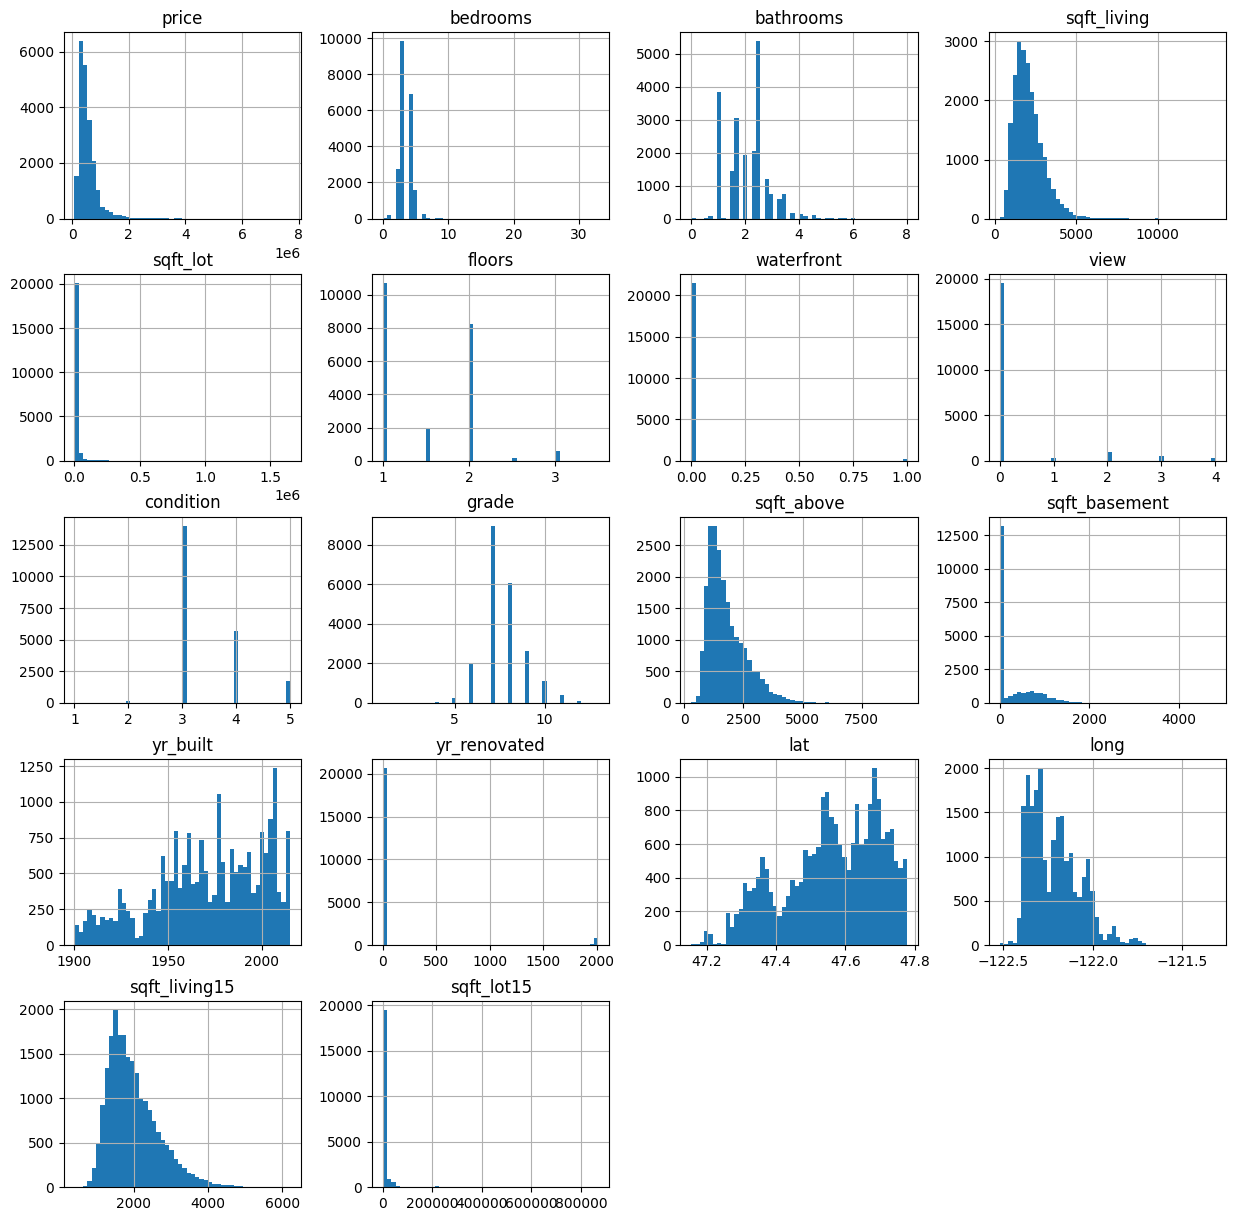

In [91]:
df.hist(bins=50,figsize=(15,15))
plt.show()

<Axes: title={'center': 'Correlation with price '}>

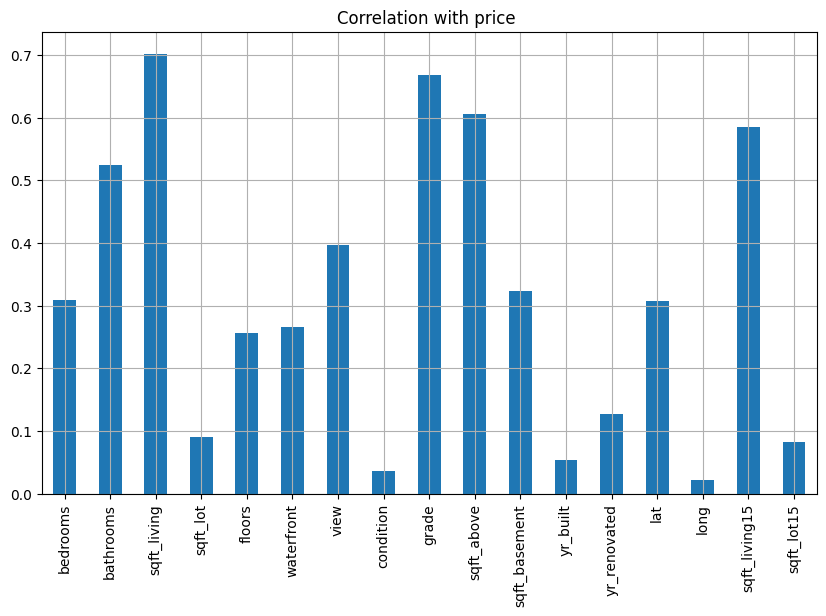

In [92]:
df.drop('price',axis=1).corrwith(df.price).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with price ")

<Axes: xlabel='waterfront', ylabel='price'>

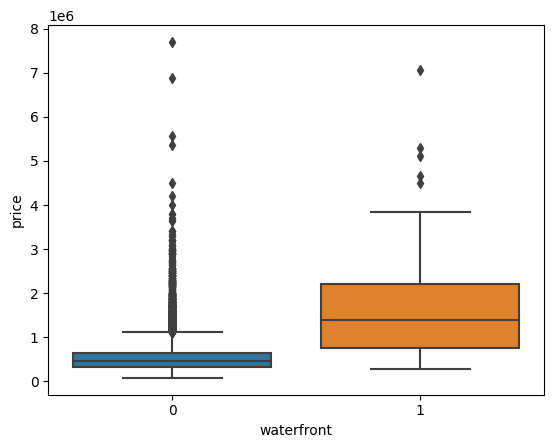

In [93]:
sns.boxplot(data=df,x=df['waterfront'],y=df['price'])

(18.5, -0.5)

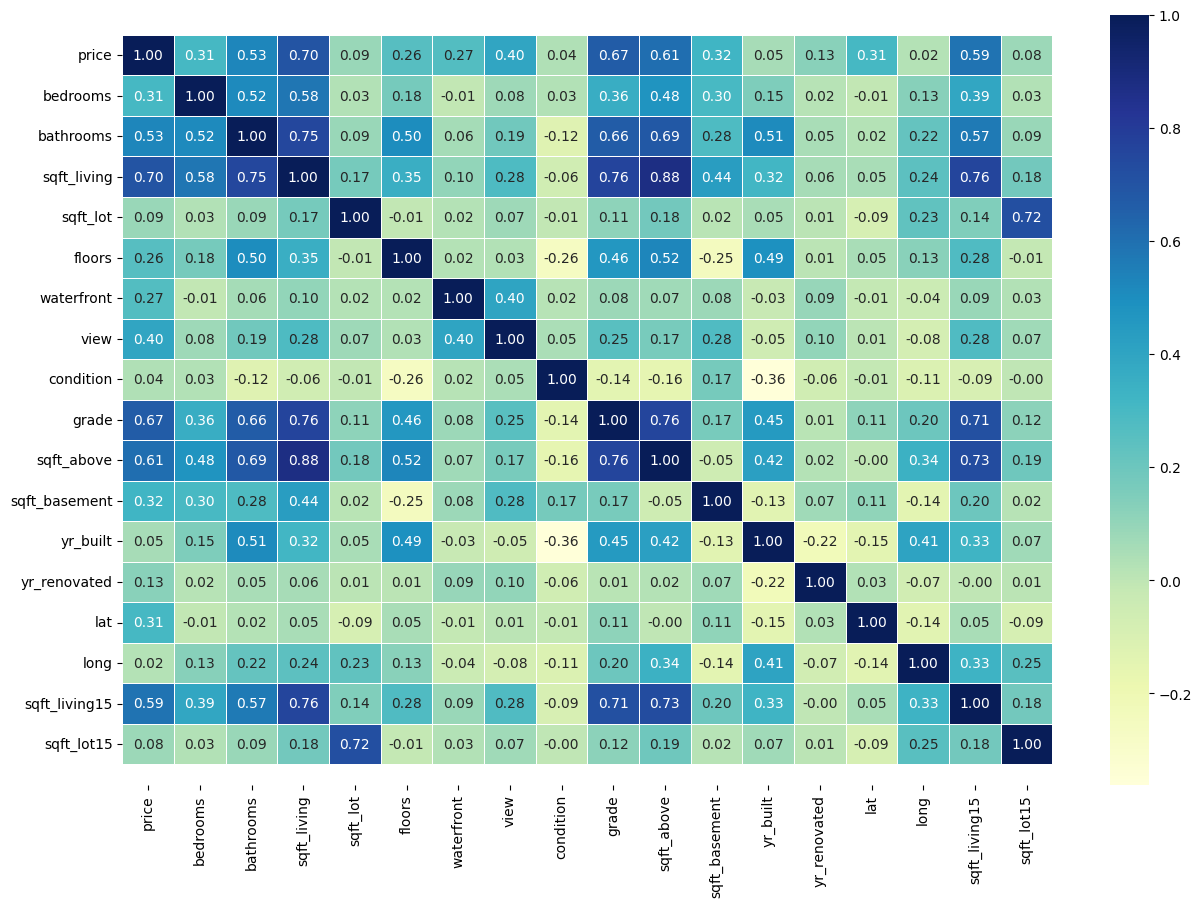

In [94]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
 annot=True,
linewidths=0.5,
fmt=".2f",
cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [95]:
df.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [96]:
x=df.drop(['price'],axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [97]:
y=df['price'].to_frame()
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [99]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


15129
15129
6484
6484


In [100]:
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [101]:
with open('modle_picke','wb') as f:
  pickle.dump('rg',f)

In [102]:
y_pred=rg.predict(x_test)
y_pred

array([[ 309004.87356303],
       [1350716.56141452],
       [ 353676.06894404],
       ...,
       [ 330763.50349871],
       [ 394654.49853944],
       [ 227388.76707582]])

In [103]:
rg.score(x_train,y_train)

0.6986295190344749

In [104]:
print(rg.score(x_train,y_train))
print(rg.score(x_test,y_test))
print(mean_absolute_error(y_test,y_pred))

0.6986295190344749
0.6870528727352059
124397.55993650664


In [105]:
rg.coef_

array([[-3.94082093e+04,  4.88232790e+04,  1.07275589e+02,
         9.63907603e-02, -1.02485339e+03,  5.84238242e+05,
         4.95161309e+04,  3.14111210e+04,  9.81997773e+04,
         7.22459751e+01,  3.50296136e+01, -2.49439475e+03,
         2.10861907e+01,  5.51187230e+05, -1.16766103e+05,
         2.49038221e+01, -3.14345787e-01]])

In [106]:
rg.intercept_

array([-36282971.93889357])

In [107]:
ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                        0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                        6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


best_alpha_ridge = grid_search.best_params_['alpha']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.85918e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.76279e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.23354e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84351e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [108]:
print("Best Parameter (alpha):", best_alpha_ridge)

Best Parameter (alpha): 0.3


In [109]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

<ipython-input-109-1b65398dabcd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [110]:
with open('module','wb') as f:
  pickle.dump(rf,f)

In [111]:
y_pred2=rf.predict(x_test)
y_pred2

array([ 432333.  , 1140741.5 ,  257560.76, ...,  235031.56,  477583.65,
        229129.34])

In [112]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))
print(mean_absolute_error(y_test,y_pred2))

0.9817910950128433
0.8744908909543083
69095.0358680782


In [113]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [114]:
with open('module1','wb') as f:
  pickle.dump(dt,f)

In [115]:
y_pred3=dt.predict(x_test)
y_pred3

array([ 440000., 1300000.,  214000., ...,  160000.,  465000.,  235000.])

In [116]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))
print(mean_absolute_error(y_test,y_pred3))

0.9817910950128433
0.8744908909543083
99579.29549660704
